# CHICKEN PRICES IN INDIA

Epp Haavasalu, Grete Hollo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

prices_df = pd.read_csv('chicken_prices_india.csv', sep=',')
prices = prices_df.values

In [2]:
df = pd.DataFrame(prices_df)

df["District"] = df["District"].str.split("(", expand=True )
df.isnull().sum()

Year           0
Month          0
District       0
1           1212
2           1191
3           1191
4           1193
5           1192
6           1167
7           1182
8           1181
9           1183
10          1216
11          1204
12          1200
13          1231
14          1205
15          1203
16          1203
17          1209
18          1187
19          1199
20          1203
21          1214
22          1258
23          1234
24          1234
25          1239
26          1251
27          1232
28          1249
29          1470
30          1606
31          2757
dtype: int64

In [3]:
df.iloc[456]

Year            2019
Month       February
District       Balia
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
30               NaN
31               NaN
Name: 456, dtype: object

In [4]:
df.describe()

,Year,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,4771.000000,3559.000000,3580.000000,3580.000000,3578.000000,3579.000000,3604.000000,3589.000000,3590.000000,3588.000000,...,3513.000000,3537.000000,3537.000000,3532.000000,3520.000000,3539.000000,3522.000000,3301.000000,3165.000000,2014.000000
mean,2019.926431,88.623209,88.732123,88.831285,123.494410,90.112042,123.846004,90.585957,90.244568,89.335006,...,89.524338,89.685609,89.223636,91.893545,88.321875,88.534614,88.579500,89.220539,89.680253,87.968719
std,0.805794,38.023238,30.768885,20.775642,2025.415909,27.488165,2032.965008,38.769086,35.361995,27.627674,...,20.514414,34.903335,20.118203,153.689267,19.672585,25.671042,25.509532,33.335619,25.903316,22.160246
min,2018.000000,16.000000,30.000000,36.000000,11.000000,30.000000,25.000000,27.000000,24.000000,18.000000,...,15.000000,15.000000,20.000000,20.000000,20.000000,8.000000,20.000000,15.000000,11.000000,15.000000
25%,2019.000000,73.000000,74.000000,75.000000,76.000000,77.000000,77.000000,77.000000,76.000000,74.000000,...,75.000000,75.000000,75.000000,76.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000
50%,2020.000000,87.000000,87.000000,88.000000,88.000000,88.000000,88.000000,88.000000,89.000000,88.000000,...,90.000000,90.000000,90.000000,90.000000,89.000000,88.000000,88.000000,88.000000,90.000000,88.000000
75%,2021.000000,100.000000,100.000000,100.250000,101.000000,102.000000,102.000000,103.000000,103.000000,102.000000,...,103.000000,102.000000,101.000000,100.000000,100.000000,100.000000,100.000000,100.000000,102.000000,100.000000
max,2021.000000,1213.000000,1069.000000,400.000000,121232.000000,1154.000000,122124.000000,1127.000000,1087.000000,1111.000000,...,145.000000,1087.000000,155.000000,9090.000000,177.000000,1078.000000,1077.000000,1219.000000,1001.000000,160.000000


In [5]:
df["Year"].value_counts()

2020    1702
2019    1683
2021    1368
2018      18
Name: Year, dtype: int64

In [6]:
df["Month"].value_counts()

February     446
July         444
January      439
March        438
May          428
April        428
August       421
June         421
September    412
November     303
October      297
December     294
Name: Month, dtype: int64

In [7]:
pd.set_option('display.max_rows', None)
df["District"].value_counts()

Safidon              99
Sangrur              83
Gurdaspur            82
Ludhiana             82
Pathankot            82
Hoshiarpur           82
Patiala              82
Nawanshahr           81
Jabalpur             66
Indore               66
Bhopal               66
Varanasi             60
Allahabad            60
Jagdishpur           60
Barnala              49
Moga                 49
Samrala              49
Mansa                49
Dasuya               49
Batala               49
Bahraich             42
Kaliabor             34
Sasaram              34
Raha                 34
Hajipur              34
Patna                34
Samastipur           34
Sarthebari           34
Darbhanga            34
Chittur              34
Mirza                34
Muzaffarpur          34
Arrah                34
Mangaldai            34
Biswantahchariali    34
Pathsala             34
Abhayapuri           34
Jagiroad             34
Bokajan              34
Golaghat             34
Bardhaman            33
Hisar           

In [8]:
'''
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]
df.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)
df = df.sort_index()

plt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor='white', align='left')
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Month')
'''

'\nsort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]\ndf.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)\ndf = df.sort_index()\n\nplt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor=\'white\', align=\'left\')\nplt.xticks(rotation=\'vertical\')\nplt.ylabel(\'Number of cases\')\nplt.xlabel(\'Month\')\n'

Text(0.5, 0, 'Town')

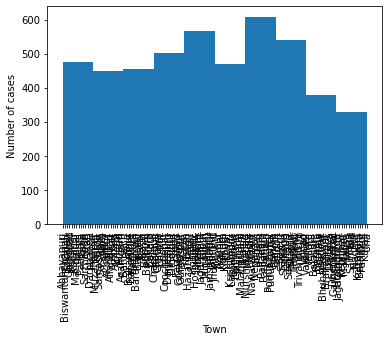

In [9]:
plt.hist(df["District"])
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Town')

### Cleaning data

In [10]:
original_data = df.copy(deep=True) # Make a deep copy, including a copy of the data and the indices

only_prices = df.drop(columns = ['Year', 'Month', 'District'])

x = 0
y = 0
changes = {}
nones = []
means = []

#print(df.iloc[15])

# iterate over rows in the prices table
for Index, row in only_prices.iterrows():
    row_changed = False
    median = row.median()
    mean_row = []
    for k in range(len(row)):
        mean_row.append(row[k])
        
    changed_values = []
    none_values = []

    # iterate over every value in the given row
    for i in range(31):
        try:
            
            if math.isnan(row[i]):
                none_values.append(i)
                row_changed = True
                
            # see if the values differ too much from the median
            elif (row[i] < median - 60) or (row[i] > median + 60): 
                
                #save the location of the value that needs changing
                changed_values.append(i)
                
                #create new row to calculate an accurate mean
                mean_row.remove(row[i])
                                
                row_changed = True
        except:
            print("error     error     error     error     error     error     error     error")
            continue
    
    if (row_changed):
        
        # if more than 5 values are missing from a row, then delete the whole row
        if len(none_values) > 5:
            nones.append(y)
        
        else: 
            mean_row  =[x for x in mean_row if math.isnan(x) == False]
            new_mean = round(sum(mean_row) / len(mean_row), 2)
            
            means.append(new_mean)
            
            for j in changed_values:
                df.iloc[y, j+3] = round(new_mean,2)

            for jj in none_values:
                df.iloc[y, jj+3] = round(new_mean,2)

            changes[y] = changed_values

            for ii in none_values:
                changes[y].append(ii)
    else:
        means.append(round(sum(mean_row) / len(mean_row), 2))
    
    y += 1


for kk in nones:
    df.drop(df.loc[df.index==kk].index, inplace=True)

df["Mean"] = means

print("Changes made: " + str(len(changes)))

Changes made: 1702


In [11]:
print(changes)

{18: [30], 19: [30], 20: [30], 21: [30], 22: [30], 23: [30], 24: [30], 25: [30], 26: [30], 27: [30], 28: [30], 29: [30], 31: [30], 32: [30], 33: [30], 34: [30], 36: [30], 37: [30], 38: [30], 39: [30], 41: [30], 42: [30], 44: [30], 45: [30], 46: [30], 47: [30], 48: [30], 49: [30], 50: [30], 51: [30], 52: [30], 53: [30], 54: [30], 55: [30], 56: [30], 57: [30], 58: [30], 59: [30], 60: [30], 61: [30], 62: [30], 63: [30], 64: [30], 65: [30], 66: [30], 67: [30], 68: [30], 69: [30], 70: [30], 71: [30], 72: [30], 73: [30], 75: [30], 77: [30], 78: [30], 79: [30], 80: [30], 81: [30], 82: [30], 83: [30], 84: [30], 85: [30], 86: [30], 87: [30], 88: [30], 89: [30], 90: [30], 91: [30], 92: [30], 93: [30], 94: [30], 95: [30], 96: [30], 97: [30], 98: [30], 99: [30], 100: [30], 101: [30], 102: [30], 103: [30], 104: [30], 105: [30], 106: [30], 107: [30], 108: [30], 109: [30], 110: [30], 111: [30], 112: [30], 113: [30], 114: [30], 115: [30], 116: [30], 117: [30], 118: [30], 119: [30], 120: [30], 121: [30

In [12]:
# ennustamine xgboost

### Cleaning states data and giving a state for each city

In [13]:
# https://github.com/thatisuday/indian-cities-database/blob/master/cities.json

with open("cities_states.txt", 'r') as text:
    tekst = text.read()
 
#for i in range(len(l))
tekst2 = tekst.split('"')
l = len(tekst2)
StatesDictionary = {}

for i in range(3, l, 8):
    linn = tekst2[i]
    state = tekst2[i+4].strip()
    state.capitalize()

    #print(d.keys(), "   ", state, "   ", state in d.keys())
    if state in StatesDictionary.keys():
        StatesDictionary[state].append(linn)
    else:
        StatesDictionary[state] = [linn]
        
    #print(d[state])
    
#print(len(d.keys()))
#print(d.keys())
#print(d[' Bulandshahr'])

print("Vähem kui 5 linna: \n")
p = 0
for e in StatesDictionary.keys():
    m = StatesDictionary[e]
    if len(m) < 5:
        print(e, " -> ", m)
        p += 1
        
print("\nKokku:", p)

Vähem kui 5 linna: 

Andaman & Nicobar Islands  ->  ['Port Blair']
Andhra pradesh  ->  ['Pondur']
Dadra & Nagar Haveli  ->  ['Amli', 'Silvassa']
Daman & Diu  ->  ['Daman and Diu', 'Daman and Diu']
Delhi  ->  ['Asola', 'Delhi']
India  ->  ['Dharampur']
Hariyana  ->  ['Ballabhgarh']
Lakshadweep  ->  ['Kavaratti']
Meghalaya  ->  ['Jowai', 'Nongstoin', 'Shillong', 'Tura']
Mizoram  ->  ['Aizawl', 'Champhai', 'Lunglei', 'Saiha']
Pondicherry  ->  ['Karaikal', 'Mahe', 'Pondicherry', 'Yanam']
Rajastan  ->  ['Banswara']
Sikkim  ->  ['Gangtok']
Tamil nadu  ->  ['Chinna salem']
Ghazipur  ->  ['Saidpur']
Hardoi  ->  ['Shahabad']
Rampur  ->  ['Shahabad']
Agra  ->  ['Shamsabad']
Farrukhabad  ->  ['Shamsabad']
Bulandshahr  ->  ['Shikarpur']
Purulia  ->  ['Adra']

Kokku: 21


In [14]:
#  West Bengal - [Nadia, Coochbehar, Dinajpur, Jalpaiguri, Hooghly, Malda]
#  Jharkhand - [Bokaro, Barhi, Hazaribagh]
#  Bihar - [Jagdishpur]
#  Rajasthan - [Jhunjhunu, Singhana, Kotputli, Chirawa]
#  Assam - [Mirza, Biswantahchariali, Kaliabor, Raha, Sarthebari, Pathsala, Mangaldai, Jagiroad, Bokajan]
#  Tamil Nadu -[Trichy, Krishnagiri, Kovai, Negercoil, Nilgiris]
#  Kerala - [Trivandrum, Cochin, Chittur, Calicut]
#  Punjab - [Dasuya, Samrala, Mahilpur, Garhshankar]
#  Karnataka - [Hosadurga]
#  Uttar Pradesh - [Gorakhpur, Akbarpur, Basti, Amethi, Faizabad]
#  Odisha - [Brahampur, Angul, Keonjhar, Jagatsinghpur] (pigem ei, või hmm.. )
print(StatesDictionary.keys())

if "West Bengal" in StatesDictionary.keys():
    for x in ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"]:
            StatesDictionary["West Bengal"].append(x)
    #StatesDictionary["West Bengal"].append(lambda x: x in ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"])
else:  
    StatesDictionary["West Bengal"] = ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"]
    
print(StatesDictionary["West Bengal"])

#StatesDictionary["Jharkhand"].append(lambda x: x for x in ["Bokaro", "Barhi", "Hazaribagh"])
for x in ["Bokaro", "Barhi", "Hazaribagh"]:
    StatesDictionary["Jharkhand"].append(x)

#StatesDictionary["Bihar"].append(lambda x: x for x in ["Jagdishpur"])
for x in ["Jagdishpur"]:
    StatesDictionary["Bihar"].append(x)

#StatesDictionary["Rajasthan"].append(lambda x: x for x in ["Jhunjhunu", "Singhana", "Kotputli", "Chirawa"])
for x in ["Jhunjhunu", "Singhana", "Kotputli", "Chirawa"]:
    StatesDictionary["Rajasthan"].append(x)
    
#StatesDictionary["Assam"].append(lambda x: x for x in ["Mirza", "Biswantahchariali", "Kaliabor", "Raha", "Sarthebari", "Pathsala", "Mangaldai", "Jagiroad", "Bokajan"])
for x in ["Mirza", "Biswantahchariali", "Kaliabor", "Raha", "Sarthebari", "Pathsala", "Mangaldai", "Jagiroad", "Bokajan"]:
        StatesDictionary["Assam"].append(x)

#StatesDictionary["Tamil Nadu"].append(lambda x: x for x in ["Trichy", "Krishnagiri", "Kovai", "Negercoil", "Nilgiris"])
for x in ["Trichy", "Krishnagiri", "Kovai", "Negercoil", "Nilgiris"]:
        StatesDictionary["Tamil Nadu"].append(x)

#StatesDictionary["Kerala"].append(lambda x: x for x in ["Trivandrum", "Cochin", "Chittur", "Calicut"])
for x in ["Trivandrum", "Cochin", "Chittur", "Calicut"]:
    StatesDictionary["Kerala"].append(x)

#StatesDictionary["Punjab"].append(lambda x: x for x in ["Dasuya", "Samrala", "Mahilpur", "Garhshankar"])
for j in ["Dasuya", "Samrala", "Mahilpur", "Garhshankar"]:
    StatesDictionary["Punjab"].append(j)

#StatesDictionary["Karnataka"].append(lambda x: x for x in ["Hosadurga"])
for t in ["Hosadurga"]:
    StatesDictionary["Karnataka"].append(t)

#StatesDictionary["Uttar Pradesh"].append(lambda x: x for x in ["Gorakhpur", "Akbarpur", "Basti", "Amethi", "Faizabad"])
for t in ["Gorakhpur", "Akbarpur", "Basti", "Amethi", "Faizabad"]:
    StatesDictionary["Uttar Pradesh"].append(t)

StatesDictionary["Odisha"] = ["Brahampur", "Angul", "Keonjhar", "Jagatsinghpur"]
    
StatesDictionary["Haryana"].append("Shahabad")
StatesDictionary.pop("Hardoi")
StatesDictionary.pop("Rampur")

StatesDictionary["Uttar Pradesh"].append("Shamsabad")
StatesDictionary.pop("Farrukhabad")
StatesDictionary.pop("Agra")


dict_keys(['Maharashtra', 'Andaman & Nicobar Islands', 'Andhra Pradesh', 'Andhra pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'India', 'Gujrat', 'Hariyana', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharastra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Pondicherry', 'Punjab', 'Rajasthan', 'Rajastan', 'Sikkim', 'West Bengal', 'Tamil Nadu', 'Tamil nadu', 'Tripura', 'Uttar Pradesh', 'Ghazipur', 'Hardoi', 'Rampur', 'Agra', 'Farrukhabad', 'Bulandshahr', 'Uttarakhand', 'Purulia'])
['Calcutta', 'Alipurduar', 'Arambagh', 'Asansol', 'Baharampur', 'Bally', 'Balurghat', 'Bankura', 'Barakar', 'Barasat', 'Bardhaman', 'Bidhan Nagar', 'Chinsura', 'Contai', 'Cooch Behar', 'Darjeeling', 'Durgapur', 'Haldia', 'Howrah', 'Islampur', 'Jhargram', 'Kharagpur', 'Kolkata', 'Mainaguri', 'Mal', 'Mathabhanga', 'Medinipur', 'Memari', 'M

['Shamsabad']

In [15]:
hehStates = []

for i in range(len(df)): # vaatab üle iga rea
    district = df.iloc[i]["District"] # selle rea district
    sai = False
    for state in StatesDictionary.keys(): # vaatab üle iga state linna
        if district in StatesDictionary[state]:
            hehStates.append(state)
            sai = True
            break
    if not sai:
        hehStates.append(np.NaN)
    
#print(len(fukenStates), len(df))

In [16]:
df["State"] = hehStates

In [17]:
dfNaN = df[df["State"].isna() == True]
dfNaN["District"].value_counts()

Series([], Name: District, dtype: int64)

In [18]:
# manuaalselt otsib ja lisab state dictionary'sse, hiljem tõstab ülespoole et ta kohe alguses ära paneks linnadele õiged stated

# state - districts

#  West Bengal - [Nadia, Coochbehar, Dinajpur, Jalpaiguri, Hooghly, Malda]
#  Jharkhand - [Bokaro, Barhi, Hazaribagh]
#  Bihar - [Jagdishpur]
#  Rajasthan - [Jhunjhunu, Singhana, Kotputli, Chirawa]
#  Assam - [Mirza, Biswantahchariali, Kaliabor, Raha, Sarthebari, Pathsala, Mangaldai, Jagiroad, Bokajan]
#  Tamil Nadu -[Trichy, Krishnagiri, Kovai, Negercoil]
#  Kerala - [Trivandrum, Cochin, Chittur, Calicut]
#  Punjab - [Dasuya, Samrala, Mahilpur, Garhshankar]
#  Karnataka - [Hosadurga]
#  Uttar Pradesh - [Gorakhpur, Akbarpur, Basti, Amethi, Faizabad]
#  Odisha - [Brahampur, Angul, Keonjhar, Jagatsinghpur] (pigem ei, või hmm.. )


#  Nilgiris (DISTRICT) - Tamil Nadu, Karnataka and Kerala (STATES)  help

In [19]:
'''district_mean = dict()
for i in range(len(df)):
    district = df.iloc[i]["District"]
    if district in district_mean:
        district_mean[district].append(df.iloc[i]["Mean"])
    else:
        district_mean[district] = [df.iloc[i]["Mean"]]
        
print(district_mean)'''

'district_mean = dict()\nfor i in range(len(df)):\n    district = df.iloc[i]["District"]\n    if district in district_mean:\n        district_mean[district].append(df.iloc[i]["Mean"])\n    else:\n        district_mean[district] = [df.iloc[i]["Mean"]]\n        \nprint(district_mean)'

### Chicken price changes based on the month

In [20]:
df_2 = df.drop(labels=["District", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], axis = 1)

In [21]:
aggregation_functions = {'Mean': 'mean'}
df_state_mean = df_2.groupby(["State", "Year", "Month"]).aggregate(aggregation_functions)

In [22]:
df_state_mean

Mean
State           Year Month                
Assam           2019 April      101.839091
                     December    78.596364
                     February    93.653636
                     January     95.971818
                     July        96.211818
                     June       105.056364
                     March      101.090000
                     May        106.451818
                     November    82.171818
                     October     86.970000
                     September   84.300000
                2020 April       78.524545
                     August     107.835455
                     December    86.610000
                     February    99.135455
                     January     92.570909
                     July       100.131818
                     June       135.330000
                     March       54.770909
                     May        131.130000
                     November    99.911818
                     October    108.351818
                     September  122.614545
                2021 April      117.670000
                     August     119.940000
                     February   117.570000
                     January    109.987273
                     July       127.290000
                     June       116.670000
                     March      131.290000
                     May         83.655455
                     September  108.975455
Bihar           2019 April      100.848889
                     August      72.691250
                     December    79.186667
                     February    80.212222
                     January     83.284444
                     July        81.470000
                     June       116.658889
                     March       91.448889
                     May        106.667778
                     November    78.803333
                     October     77.680000
                     September   85.451250
                2020 April       73.188571
                     August      81.378571
                     December    93.670000
                     February    77.242222
                     January     89.097778
                     July        92.480000
                     June       131.400000
                     March       37.410000
                     May        122.765714
                     November    85.285000
                     October     91.845000
                     September   88.370000
                2021 April      100.838750
                     August      90.795000
                     February    74.885000
                     January     89.798750
                     July       109.822500
                     June       118.966250
                     March       99.741250
                     May        106.101250
                     September   90.983750
Gujarat         2019 April       95.900000
                     August      59.183333
                     December    68.416667
                     February    69.693333
                     January     72.000000
                     July        73.686667
                     June       103.886667
                     March       85.993333
                     May         95.720000
                     November    73.556667
                     October     78.310000
                     September   78.533333
                2020 April       74.745000
                     August      64.225000
                     December    93.047500
                     February    63.730000
                     January     81.040000
                     July        89.495000
                     June       115.127500
                     May        111.400000
                     November    86.957500
                     October     95.550000
                     September   83.150000
                2021 April       95.440000
                     August     100.130000
                     February    64.097500
                     January     67.735

In [23]:
df_state_mean_2 = df_state_mean.reset_index()

df_state_mean_2019 = df_state_mean_2.loc[df_state_mean_2['Year']==2019]
df_state_mean_2020 = df_state_mean_2.loc[df_state_mean_2['Year']==2020]
df_state_mean_2021 = df_state_mean_2.loc[df_state_mean_2['Year']==2021]

<ipython-input-24-f52ab30043eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_mean_2019['Month'] = pd.Categorical(df_state_mean_2019['Month'], categories=list(calendar.month_name)[1:], ordered=True)


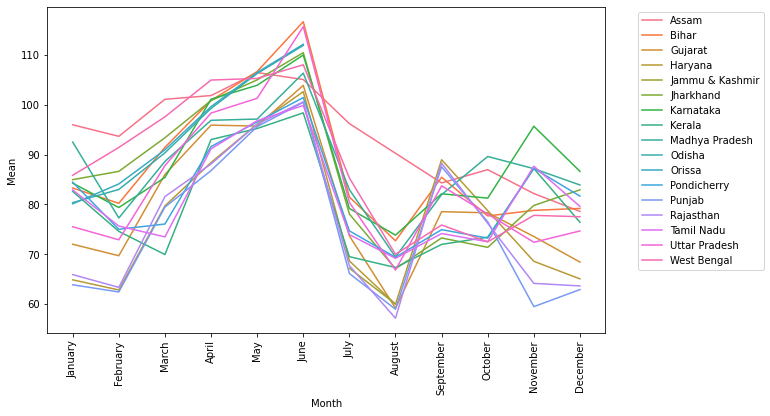

<ipython-input-24-f52ab30043eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_mean_2020['Month'] = pd.Categorical(df_state_mean_2020['Month'], categories=list(calendar.month_name)[1:], ordered=True)


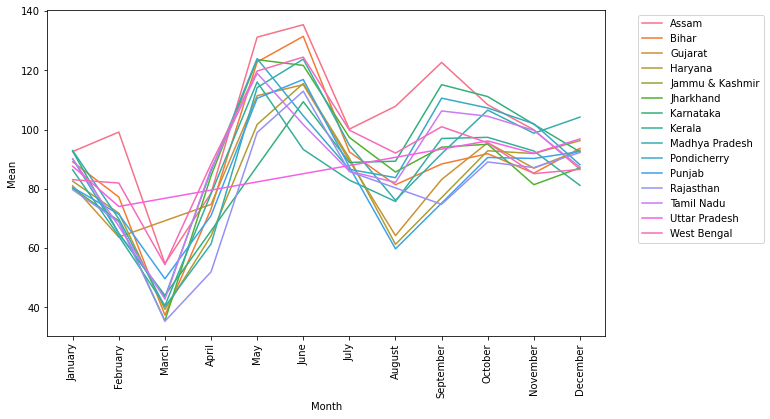

<ipython-input-24-f52ab30043eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_mean_2021['Month'] = pd.Categorical(df_state_mean_2021['Month'], categories=list(calendar.month_name)[1:], ordered=True)


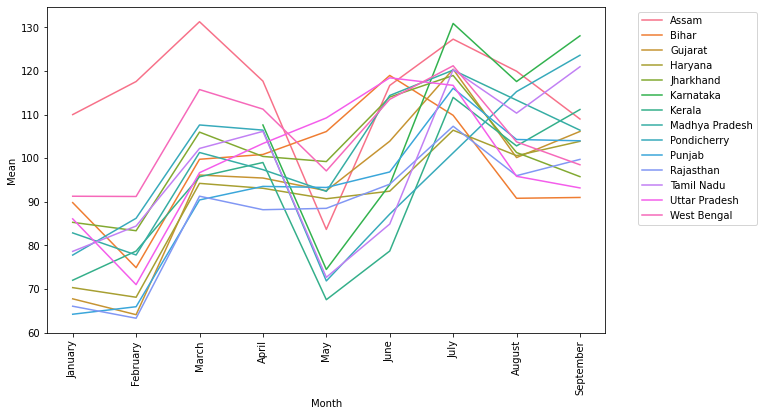

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# set the month column as categorical and set the order for calendar months
df_state_mean_2019['Month'] = pd.Categorical(df_state_mean_2019['Month'], categories=list(calendar.month_name)[1:], ordered=True)

# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_state_mean_2019['Month'], y=df_state_mean_2019['Mean'], data=df_state_mean_2019, hue=df_state_mean_2019['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

df_state_mean_2020['Month'] = pd.Categorical(df_state_mean_2020['Month'], categories=list(calendar.month_name)[1:], ordered=True)

# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_state_mean_2020['Month'], y=df_state_mean_2020['Mean'], data=df_state_mean_2020, hue=df_state_mean_2020['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

# set the month column as categorical and set the order for calendar months
df_state_mean_2021['Month'] = pd.Categorical(df_state_mean_2021['Month'], categories=list(calendar.month_name)[1:], ordered=True)

# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_state_mean_2021['Month'], y=df_state_mean_2021['Mean'], data=df_state_mean_2021, hue=df_state_mean_2021['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [25]:
#print(df_state_mean.index.get_level_values('State').unique())

In [26]:
df_year_mean = df_2.drop(labels="Month", axis = 1).groupby(["State", "Year"]).aggregate({'Mean': 'mean'}).reset_index()
# siit jätab välja Odisha (index=26) ja Orissa (index=27), sest mõlemal ainult 2019 andmed

df_year_mean.drop([26, 27], inplace=True)

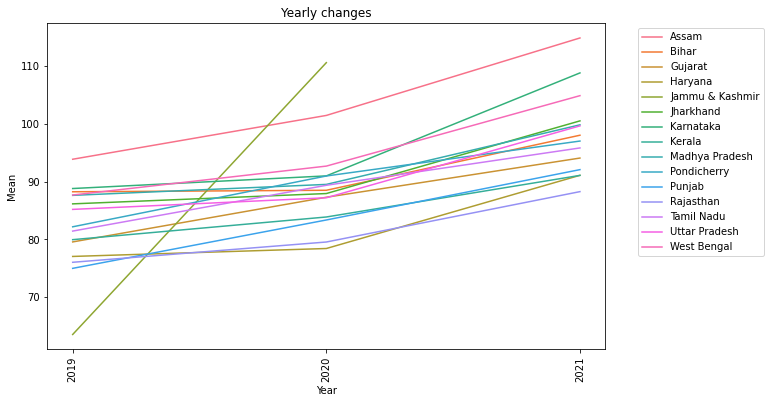

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_year_mean['Year'], y=df_year_mean['Mean'], data=df_year_mean, hue=df_year_mean['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ticks_data = [2019,2020,2021]
plt.xticks(ticks_data)
plt.xticks(rotation=90)
plt.title("Yearly changes")
plt.show()

### Chicken price changes based on the season

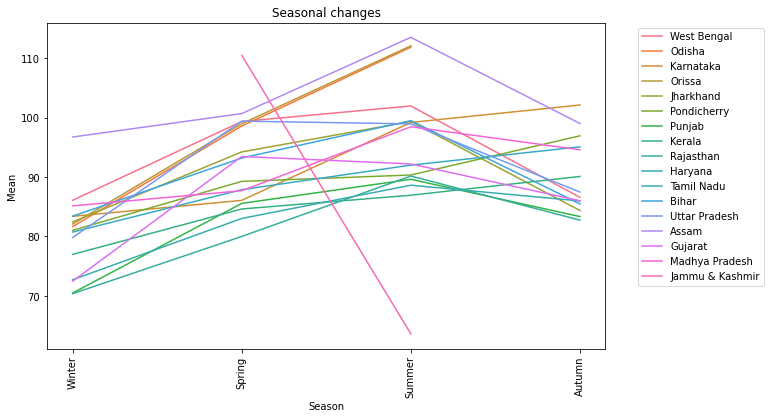

In [28]:
winter = ['December', 'January', 'February']
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']

seasons = []
for i in range(len(df_state_mean_2["Month"])):
    month = df_state_mean_2.iloc[i]["Month"]
    if month in winter:
        seasons.append("Winter")
    elif month in spring:
        seasons.append("Spring")
    elif month in summer:
        seasons.append("Summer")
    else: # month in autumn
        seasons.append("Autumn")
        
df_state_season_mean = df_state_mean_2.copy().drop(labels=["Month", "Year"], axis = 1)
df_state_season_mean["Season"] = seasons
df_state_season_mean = df_state_season_mean.groupby(["State", "Season"]).aggregate({'Mean': 'mean'})

df_state_season_mean_2 = df_state_season_mean.reset_index()

sort_order = ["Winter", "Spring", "Summer", "Autnum"]
df_state_season_mean_2.index = pd.CategoricalIndex(df_state_season_mean_2["Season"], categories=sort_order, ordered=True)
df_state_season_mean_2 = df_state_season_mean_2.sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_state_season_mean_2['Season'], y=df_state_season_mean_2['Mean'], data=df_state_season_mean_2, hue=df_state_season_mean_2['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Seasonal changes")
plt.show()

In [29]:
df_state_season_mean

Mean
State           Season            
Assam           Autumn   99.042208
                Spring  100.713535
                Summer  113.558182
                Winter   96.761932
Bihar           Autumn   85.488333
                Spring   93.223455
                Summer   99.518051
                Winter   83.422135
Gujarat         Autumn   86.026071
                Spring   93.481979
                Summer   92.222963
                Winter   72.470000
Haryana         Autumn   85.987347
                Spring   83.041812
                Summer   88.640899
                Winter   72.718690
Jammu & Kashmir Spring  110.520000
                Summer   63.595000
Jharkhand       Autumn   84.381143
                Spring   94.251333
                Summer   99.384667
                Winter   82.456250
Karnataka       Autumn  102.154857
                Spring   86.091000
                Summer   99.214667
                Winter   83.393750
Kerala          Autumn   90.119762
                Spring   84.637589
                Summer   86.954365
                Winter   76.984226
Madhya Pradesh  Autumn   94.612143
                Spring   87.716204
                Summer   98.489375
                Winter   85.157500
Odisha          Spring   98.622500
                Summer  111.902500
                Winter   81.670000
Orissa          Spring   99.010000
                Summer  112.128000
                Winter   82.108000
Pondicherry     Autumn   96.964286
                Spring   89.286667
                Summer   90.363750
                Winter   81.038750
Punjab          Autumn   83.357850
                Spring   85.578370
                Summer   89.637360
                Winter   70.473280
Rajasthan       Autumn   82.760918
                Spring   80.007725
                Summer   90.188214
                Winter   70.373542
Tamil Nadu      Autumn   95.102911
                Spring   87.888595
                Summer   92.028296
                Winter   80.747867
Uttar Pradesh   Autumn   87.486000
                Spring   99.441987
                Summer   98.970582
                Winter   79.829335
West Bengal     Autumn   86.597473
                Spring   99.374274
                Summer  101.993675
                Winter   86.108750

### Chicken price changes based on the day of the month

In [30]:
# changes = dict: key=row, values=changed_value_index

df_3 = df.drop(labels=["Month", "District"], axis=1)
#df_3 = df_3.groupby("State").apply(print)

l = len(df_3)
state_year_day_mean = {} # (state : (year : (day : means))

for day in range(1,32): # päevad: 1-31
    
    for row in range(l): # read otsast lõpuni
        value = df_3[str(day)].iloc[row] # selle päeva üks väärtustest
        year = df_3["Year"].iloc[row]
        state = df_3["State"].iloc[row]
        add = True
        if row in changes.keys(): # changes = {18:[3,5]}
            if day in changes[row]: # 3 in [3,5]
                for i in changes[row]: 
                    if day == i: # 3 == 3
                        #don't add, because it is a changed value
                        add = False
                        break
        if add:
            if state in state_year_day_mean.keys():
                year_day_mean = state_year_day_mean[state].keys()
                if year in year_day_mean:
                    day_mean = state_year_day_mean[state][year].keys()
                    if str(day) in day_mean:
                        state_year_day_mean[state][year][str(day)].append(value)
                    else: 
                        state_year_day_mean[state][year][str(day)] = [value]
                else:
                    state_year_day_mean[state][year] = {str(day): [value]}
            else:
                state_year_day_mean[state] = {year : {str(day): [value]}}

labels = [str(i+1) for i in range(31)]
labels.insert(0, "Year")
labels.insert(0, "State")

#dataframe_state_year_day_mean
df_s_y_d_m = pd.DataFrame(columns=labels)

import statistics as sta

i = 0
for state in state_year_day_mean:
    
    for year in state_year_day_mean[state]:
        df_s_y_d_m.loc[i, "Year"] = year
        df_s_y_d_m.loc[i, "State"] = state
            
        for day in state_year_day_mean[state][year]:
            mean = round(sta.mean(state_year_day_mean[state][year][day]),2)
            #state_year_day_mean[state][year][day] = mean
            df_s_y_d_m.loc[i, day] = mean
            
        i += 1

df_s_y_d_m

,State,Year,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,Uttar Pradesh,2019,82.34,85.01,86.74,87.16,86.95,85.83,84.39,83.91,...,85.94,86.06,86.16,86.68,85.26,84.5,85.48,85.32,84.82,84.8
1,Uttar Pradesh,2020,89.48,89.48,89.46,89.84,90.59,90.72,91.38,91.03,...,86.31,87.33,85.62,85.31,83.41,81.64,81.77,83.64,89.07,87.32
2,Uttar Pradesh,2021,97.38,97.82,98.38,97.73,100.0,101.48,104.26,102.64,...,98.2,99.38,100.65,98.97,99.98,98.43,97.18,97.3,96.51,100.6
3,Rajasthan,2019,75.38,76.08,77.15,78.46,79.04,78.02,75.85,75.9,...,75.64,75.49,76.14,75.89,75.54,75.69,76.89,77.09,74.24,75.93
4,Rajasthan,2020,76.74,79.37,79.69,79.32,80.15,79.09,80.69,80.97,...,82.99,80.38,79.71,78.46,79.63,81.5,80.51,84.16,84.52,76.34
5,Rajasthan,2021,85.4,86.45,88.25,88.94,89.89,92.2,93.05,91.58,...,86.24,87.09,86.0,85.17,83.74,85.39,87.31,86.37,85.61,87.69
6,Haryana,2019,76.15,76.67,78.24,79.78,80.35,80.04,78.58,77.84,...,76.52,75.16,77.52,77.36,76.49,75.76,77.0,77.14,74.2,77.01
7,Haryana,2020,74.98,77.86,78.75,78.11,77.88,77.45,77.29,78.11,...,80.14,80.75,79.46,77.79,77.96,79.5,80.16,84.83,86.03,78.11
8,Haryana,2021,87.67,88.33,90.81,90.81,92.52,94.19,95.67,94.33,...,89.96,89.52,89.48,88.93,86.63,87.37,89.22,88.71,87.81,90.72
9,Gujarat,2019,79.83,79.61,79.86,80.75,80.44,80.25,79.31,78.61,...,79.14,78.97,79.19,79.9,79.58,80.11,80.12,79.86,78.23,79.49


### Chicken price changes based on the month by cities

In [31]:
df_district_mean = df.copy().drop(labels=["State", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], axis = 1)
df_district_mean = df_district_mean.groupby(["District", "Year", "Month"]).aggregate({'Mean': 'mean'})
df_district_mean

Mean
District          Year Month                
Abhayapuri        2019 April       98.200000
                       December    76.550000
                       February    89.040000
                       January     90.420000
                       July        91.880000
                       June       102.330000
                       March       96.000000
                       May        102.900000
                       November    77.730000
                       October     82.160000
                       September   82.330000
                  2020 April       78.670000
                       August     107.940000
                       December    86.610000
                       February    94.280000
                       January     88.130000
                       July       100.320000
                       June       135.330000
                       March       53.590000
                       May        131.130000
                       November    99.730000
                       October    108.350000
                       September  122.430000
                  2021 April      117.670000
                       August     119.940000
                       February   117.570000
                       January    110.060000
                       July       127.290000
                       June       116.670000
                       March      131.290000
                       May         83.610000
                       September  108.970000
Agra              2019 April       90.670000
                       February    65.820000
                       January     69.160000
                       March       83.480000
                       May         98.770000
Ajmer             2019 April       92.070000
                       August      58.230000
                       December    66.060000
                       February    65.320000
                       January     67.970000
                       July        70.970000
                       June       101.970000
                       March       85.230000
                       May         98.160000
                       November    69.470000
                       October     79.390000
                       September   85.830000
                  2020 April       48.370000
                       December    91.060000
                       February    69.240000
                       January     81.900000
                       July        87.170000
                       June       115.570000
                       March       34.900000
                       May         98.770000
                       November    86.100000
                       October     92.350000
                       September   77.030000
                  2021 April       89.530000
                       August      96.000000
                       February    64.040000
                       January     67.650000
                       July       109.290000
                       June        98.000000
                       March       94.900000
                       May         89.030000
                       September  101.670000
Akbarpur          2019 April       98.970000
                       February    74.180000
                       January     76.970000
                       March       88.230000
                  2020 February    73.040000
Allahabad         2019 April       97.215000
                       August      66.710000
                       December    75.385000
                       February    73.410000
                       January     75.805000
                       July        78.290000
                       June       114.135000
                       March       87.600000
                       May         99.615000
                       November    73.220000
                       September   83.800000
                  2020 December    96.260000
                       February    73.155000
                       January     

### Predicting (not doing this)

In [32]:
df_state_mean = df_state_mean.reset_index()
#print(df_state_mean)

In [33]:
df_state_mean

,State,Year,Month,Mean
0,Assam,2019,April,101.839091
1,Assam,2019,December,78.596364
2,Assam,2019,February,93.653636
3,Assam,2019,January,95.971818
4,Assam,2019,July,96.211818
5,Assam,2019,June,105.056364
6,Assam,2019,March,101.090000
7,Assam,2019,May,106.451818
8,Assam,2019,November,82.171818
9,Assam,2019,October,86.970000


In [34]:
month_map = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8,  "September": 9, "October": 10, "November": 11, "December": 12}

month_nr = []

for x in df_state_mean['Month']:
    month_nr.append(month_map[x])

#district_map = {}
#i = 1
#for x in train_state_mean['District'].unique():
#    district_map[x] = i
#    i += 1

#district_nr = []
#for x in train['District']:
#    district_nr.append(district_map[x])
    
state_map = {}
i = 1
for x in df_state_mean['State'].unique():
    state_map[x] = i
    i += 1

state_nr = []
for x in df_state_mean['State']:
    state_nr.append(state_map[x])

x={'Year':df_state_mean["Year"],'Month':month_nr,'State':state_nr, 'Mean':df_state_mean['Mean']}
#x.insert(2, 'district', district_nr, True)
df_state_mean = pd.DataFrame(data=x)

print(len(month_nr))
print(len(state_nr))
print(len(df_state_mean['Mean']))

458
458
458


In [35]:
df_state_mean

,Year,Month,State,Mean
0,2019,4,1,101.839091
1,2019,12,1,78.596364
2,2019,2,1,93.653636
3,2019,1,1,95.971818
4,2019,7,1,96.211818
5,2019,6,1,105.056364
6,2019,3,1,101.090000
7,2019,5,1,106.451818
8,2019,11,1,82.171818
9,2019,10,1,86.970000


In [36]:
import statsmodels.api as sm
#from statsmodels.tsa.statespace import SARIMAX

train = df_state_mean[(df_state_mean["Year"] == 2019) | (df_state_mean["Year"] == 2020)] 
test = df_state_mean[df_state_mean["Year"] == 2021]

sarimax_model = sm.tsa.statespace.SARIMAX(train["Mean"],order=(1,1,1),seasonal_order=(1,1,1,4), exog=train["Month"]).fit()

C:\Users\greteh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\greteh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [37]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              Mean   No. Observations:                  337
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood               -1425.409
Date:                           Tue, 14 Dec 2021   AIC                           2862.818
Time:                                   10:47:52   BIC                           2885.648
Sample:                                        0   HQIC                          2871.923
                                           - 337                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month          0.4466      0.310      1.441      0.150      -0.161       1.054
ar.L1         -0.1856      0.050     -3.723      0.000      -0.283      -0.088
ma.L1         -0.9299      0.028    -33.364      0.000      -0.984      -0.875
ar.S.L4       -0.0102      0.072     -0.141      0.888      -0.151       0.131
ma.S.L4       -0.9851      0.039    -25.137      0.000      -1.062      -0.908
sigma2       296.4927     26.280     11.282      0.000     244.984     348.001
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.70   Prob(JB):                         0.80
Heteroskedasticity (H):               0.85   Skew:                            -0.03
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
import pmdarima as pm

In [39]:
results = pm.auto_arima(df_state_mean, seasonal = True, m = , d = 1, D = 1,  )

SyntaxError: invalid syntax (<ipython-input-39-2aa8328b93ff>, line 1)

In [ ]:
from pmdarima.model_selection import train_test_split

In [ ]:
train2, test2 = train_test_split(df_state_mean, test_size = 0.3)

In [ ]:
test2.shape

In [ ]:
prediction = pd.DataFrame(results.predict(n_periods = 134), test2.index)
prediction.columns = {"Predicted_prices"}
test["Predicted_prices"] = prediction